# 图像处理+180776+胡欣毅(Python版)
# 11周上课随堂任务

1. 选两张图片,resize到同一尺寸
2. 图片进行傅里叶变换得到幅度和相角
3. 利用幅度、相角进行恢复、交叉恢复,判断幅度(模)与相位的重要性

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.fftpack import fft,ifft
%matplotlib inline

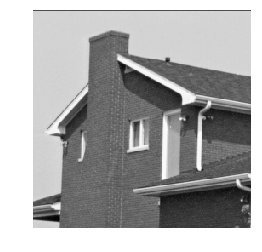

(256, 256)

In [2]:
im1 = cv2.imread('../data/4.1.05.tiff')

gray1 = cv2.cvtColor(im1 , cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(gray1,cmap='gray')
plt.axis("off")
plt.show()
gray1.shape

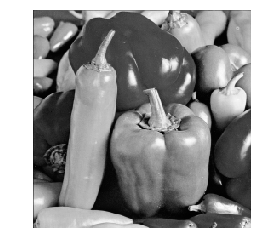

(256, 256)

In [3]:
im2 = cv2.imread('../data/4.2.07.tiff')

gray2 = cv2.cvtColor(im2 , cv2.COLOR_RGB2GRAY)
gray2 = cv2.resize(gray2, gray1.shape, cv2.INTER_CUBIC)
plt.figure()
plt.imshow(gray2,cmap='gray')
plt.axis("off")
plt.show()
gray2.shape

In [4]:
def get_complex(real,imag):
    mat = np.zeros_like(real,dtype= np.complex64)
    mat.real = np.array(real)
    mat.imag = np.array(imag)
    return mat

# 参考网上

In [5]:
fx = np.fft.fft2(gray1)
fshiftx = np.fft.fftshift(fx)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1x = np.log(np.abs(fx))
s2x = np.log(np.abs(fshiftx))

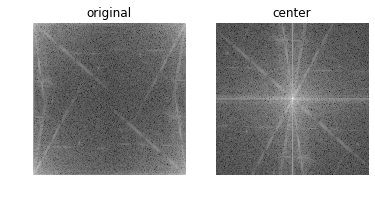

In [6]:
plt.figure()
plt.subplot(121)
plt.imshow(s1x,'gray')
plt.axis('off')
plt.title('original')
plt.subplot(122)
plt.imshow(s2x,'gray')
plt.axis('off')
plt.title('center')
plt.show()

In [7]:
fy = np.fft.fft2(gray2)
fshifty = np.fft.fftshift(fy)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1y = np.log(np.abs(fy))
s2y = np.log(np.abs(fshifty))

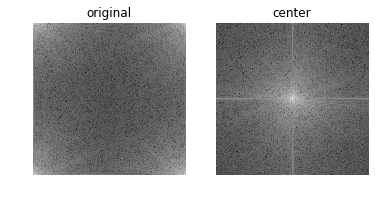

In [8]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.imshow(s1y,'gray')
plt.title('original')
plt.subplot(122)
plt.axis('off')
plt.imshow(s2y,'gray')
plt.title('center')
plt.show()

Text(0.5, 1.0, 'only phase')

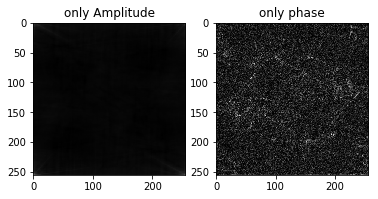

In [9]:
f1shiftx = np.fft.ifftshift(np.abs(fshiftx))
img_backx = np.fft.ifft2(f1shiftx)
#出来的是复数，无法显示
img_backx = np.abs(img_backx)
#调整大小范围便于显示
img_backx = (img_backx-np.amin(img_backx))/(np.amax(img_backx)-np.amin(img_backx))

plt.subplot(121)
plt.imshow(img_backx,'gray')
plt.title('only Amplitude')

# 逆变换--取相位
f2shiftx = np.fft.ifftshift(np.angle(fshiftx))
img_backx = np.fft.ifft2(f2shiftx)
#出来的是复数，无法显示
img_backx = np.abs(img_backx)
#调整大小范围便于显示
img_backx = (img_backx-np.amin(img_backx))/(np.amax(img_backx)-np.amin(img_backx))

plt.subplot(122)
plt.imshow(img_backx,'gray')
plt.title('only phase')

Text(0.5, 1.0, 'only phase')

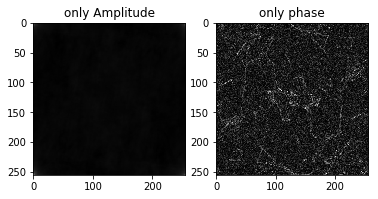

In [10]:
f1shifty = np.fft.ifftshift(np.abs(fshifty))
img_backy = np.fft.ifft2(f1shifty)
#出来的是复数，无法显示
img_backy = np.abs(img_backy)
#调整大小范围便于显示
img_backy = (img_backy-np.amin(img_backy))/(np.amax(img_backy)-np.amin(img_backy))

plt.subplot(121)
plt.imshow(img_backy,'gray')
plt.title('only Amplitude')


# 逆变换--取相位
f2shifty = np.fft.ifftshift(np.angle(fshifty))
img_backy = np.fft.ifft2(f2shifty)
#出来的是复数，无法显示
img_backy = np.abs(img_backy)
#调整大小范围便于显示
img_backy = (img_backy-np.amin(img_backy))/(np.amax(img_backy)-np.amin(img_backy))
plt.subplot(122)
plt.imshow(img_backy,'gray')
plt.title('only phase')

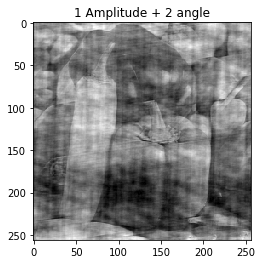

In [11]:
# 逆变换--将两者合成
s1x = np.abs(fshiftx) #取振幅
s1y_angle = np.angle(fshifty) #取相位
s1_real = s1x*np.cos(s1y_angle) #取实部
s1_imag = s1x*np.sin(s1y_angle) #取虚部
s2 = get_complex(s1_real,s1_imag)

f2shift = np.fft.ifftshift(s2) #对新的进行逆变换
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))

plt.figure()
plt.imshow(img_back,'gray')
plt.title('1 Amplitude + 2 angle')
plt.show()

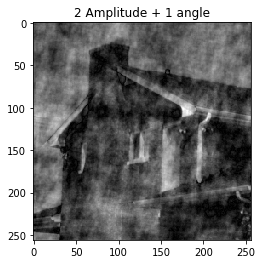

In [12]:
# 逆变换--将两者合成
s1y = np.abs(fshifty) #取振幅
s1x_angle = np.angle(fshiftx) #取相位
s1_real = s1y*np.cos(s1x_angle) #取实部
s1_imag = s1y*np.sin(s1x_angle) #取虚部
s2 = get_complex(s1_real,s1_imag)

f2shift = np.fft.ifftshift(s2) #对新的进行逆变换
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))

plt.figure()
plt.imshow(img_back,'gray')
plt.title('2 Amplitude + 1 angle')
plt.show()

结论：相位重要

# 基于Numpy

In [13]:
# test fft & ifft
a = np.array([[1,2,3,4],[5,6,7,8]])
aa = np.fft.fft2(a)
aaa = np.fft.ifft2(aa)

In [14]:
im1_fft = np.fft.fft2(gray1)
im1_fft_abs = np.abs(im1_fft)
im1_fft_angle = np.angle(im1_fft)

im2_fft = np.fft.fft2(gray2)
im2_fft_abs = np.abs(im2_fft)
im2_fft_angle = np.angle(im2_fft)

In [15]:
im1_fft_abs 
im1_fft_angle 
im2_fft_abs 
im2_fft_angle 

array([[ 0.        , -0.5688778 ,  3.09290434, ..., -1.23062992,
        -3.09290434,  0.5688778 ],
       [-1.78706163, -0.5780556 , -0.69662736, ...,  2.5907168 ,
        -3.04053237, -0.82268402],
       [-0.35148906,  0.72898341,  2.46928307, ..., -0.24777614,
        -0.33834047,  2.46728396],
       ...,
       [-0.25799946, -2.26311786,  0.71997   , ..., -0.94423013,
        -1.8563527 ,  0.72145563],
       [ 0.35148906, -2.46728396,  0.33834047, ...,  2.58321396,
        -2.46928307, -0.72898341],
       [ 1.78706163,  0.82268402,  3.04053237, ...,  1.51899348,
         0.69662736,  0.5780556 ]])

In [16]:
# dst1 ~dst4
# 恢复
# dst1 :im1_fft_abs im1_fft_angle 
# dst2 :im2_fft_abs im2_fft_angle 
# 交叉
# dst3 :im1_fft_abs im2_fft_angle 
# dst4 :im2_fft_abs im1_fft_angle 

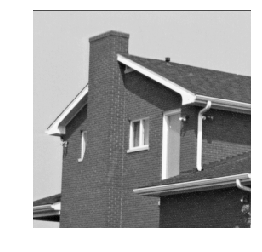

In [17]:
# dst1 :im1_fft_abs im1_fft_angle 
real = im1_fft_abs*np.cos(im1_fft_angle )
imag = im1_fft_abs*np.sin(im1_fft_angle )
dst1 = np.fft.ifft2(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst1),cmap='gray')
plt.axis("off")
plt.show()

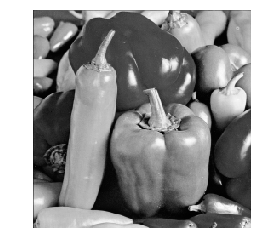

In [18]:
# dst2 :im2_fft_abs im2_fft_angle 
real = im2_fft_abs*np.cos(im2_fft_angle )
imag = im2_fft_abs*np.sin(im2_fft_angle )
dst2 = np.fft.ifft2(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst2),cmap='gray')
plt.axis("off")
plt.show()

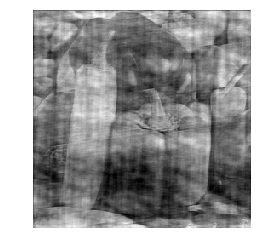

In [19]:
# dst3 :im1_fft_abs im2_fft_angle 
real = im1_fft_abs*np.cos(im2_fft_angle )
imag = im1_fft_abs*np.sin(im2_fft_angle )
dst3 = np.fft.ifft2(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst3),cmap='gray')
plt.axis("off")
plt.show()

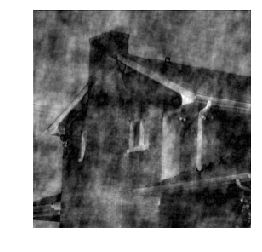

In [20]:
# dst4 :im2_fft_abs im1_fft_angle 
real = im2_fft_abs*np.cos(im1_fft_angle )
imag = im2_fft_abs*np.sin(im1_fft_angle )
dst4 = np.fft.ifft2(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst4),cmap='gray')
plt.axis("off")
plt.show()

结论：相位重要

# 基于SciPy

In [21]:
# test fft & ifft
a = np.array([[1,2,3,4],[5,6,7,8]])
aa = fft(a)
aaa = ifft(aa)

In [22]:
# dst1 ~dst4
# 恢复
# dst1 :im1_fft_abs im1_fft_angle 
# dst2 :im2_fft_abs im2_fft_angle 
# 交叉
# dst3 :im1_fft_abs im2_fft_angle 
# dst4 :im2_fft_abs im1_fft_angle 

In [23]:
im1_fft = fft(gray1)
im1_fft_abs = np.abs(im1_fft)
im1_fft_angle = np.angle(im1_fft)

im2_fft = fft(gray2)
im2_fft_abs = np.abs(im2_fft)
im2_fft_angle = np.angle(im2_fft)

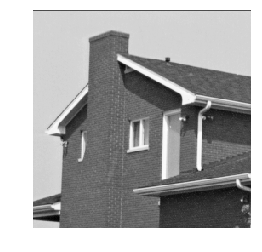

In [24]:
# dst1 :im1_fft_abs im1_fft_angle 
real = im1_fft_abs*np.cos(im1_fft_angle )
imag = im1_fft_abs*np.sin(im1_fft_angle )
dst1 = ifft(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst1),cmap='gray')
plt.axis("off")
plt.show()

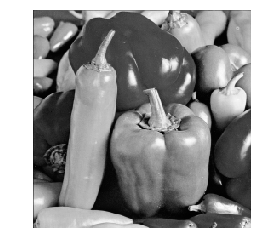

In [25]:
# dst2 :im2_fft_abs im2_fft_angle 
real = im2_fft_abs*np.cos(im2_fft_angle )
imag = im2_fft_abs*np.sin(im2_fft_angle )
dst2 = ifft(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst2),cmap='gray')
plt.axis("off")
plt.show()

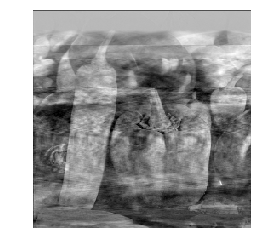

In [26]:
# dst3 :im1_fft_abs im2_fft_angle 
real = im1_fft_abs*np.cos(im2_fft_angle )
imag = im1_fft_abs*np.sin(im2_fft_angle )
dst3 = ifft(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst3),cmap='gray')
plt.axis("off")
plt.show()

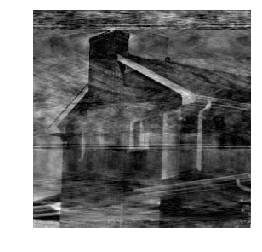

In [27]:
# dst4 :im2_fft_abs im1_fft_angle 
real = im2_fft_abs*np.cos(im1_fft_angle )
imag = im2_fft_abs*np.sin(im1_fft_angle )
dst3 = ifft(get_complex(real,imag) )

plt.figure()
plt.imshow(np.abs(dst3),cmap='gray')
plt.axis("off")
plt.show()

结论：相位重要

# 图像处理+180776+胡欣毅(C++版)

[c++](c++/hxy.cpp)